## 00. Pytorch fundamentals 
Resource notebook: https://www.learnpytorch.io/00_pytorch_fundamentals/

In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(torch.__version__)

2.0.1+cu117


## Introduction to tensors

### Creating tensors

In [3]:
#Scaler
scalar = torch.tensor(7)
scalar

tensor(7)

In [4]:
scalar.ndim

0

In [5]:
scalar.item()

7

In [6]:
vector = torch.tensor([7,7])

In [7]:
vector.ndim

1

In [8]:
vector.shape

torch.Size([2])

## Matrix

In [9]:
MATRIX = torch.tensor([[7,8],
                      [9,10]])

In [10]:
MATRIX[1]

tensor([ 9, 10])

In [11]:
MATRIX.shape

torch.Size([2, 2])

In [12]:
# Tensor
TENSOR = torch.tensor([[[1,2,3],
                       [2,3,4],
                       [3,6,9]]])
TENSOR

tensor([[[1, 2, 3],
         [2, 3, 4],
         [3, 6, 9]]])

In [13]:
TENSOR.ndim

3

In [14]:
TENSOR.shape

torch.Size([1, 3, 3])

In [15]:
TENSOR[0]

tensor([[1, 2, 3],
        [2, 3, 4],
        [3, 6, 9]])

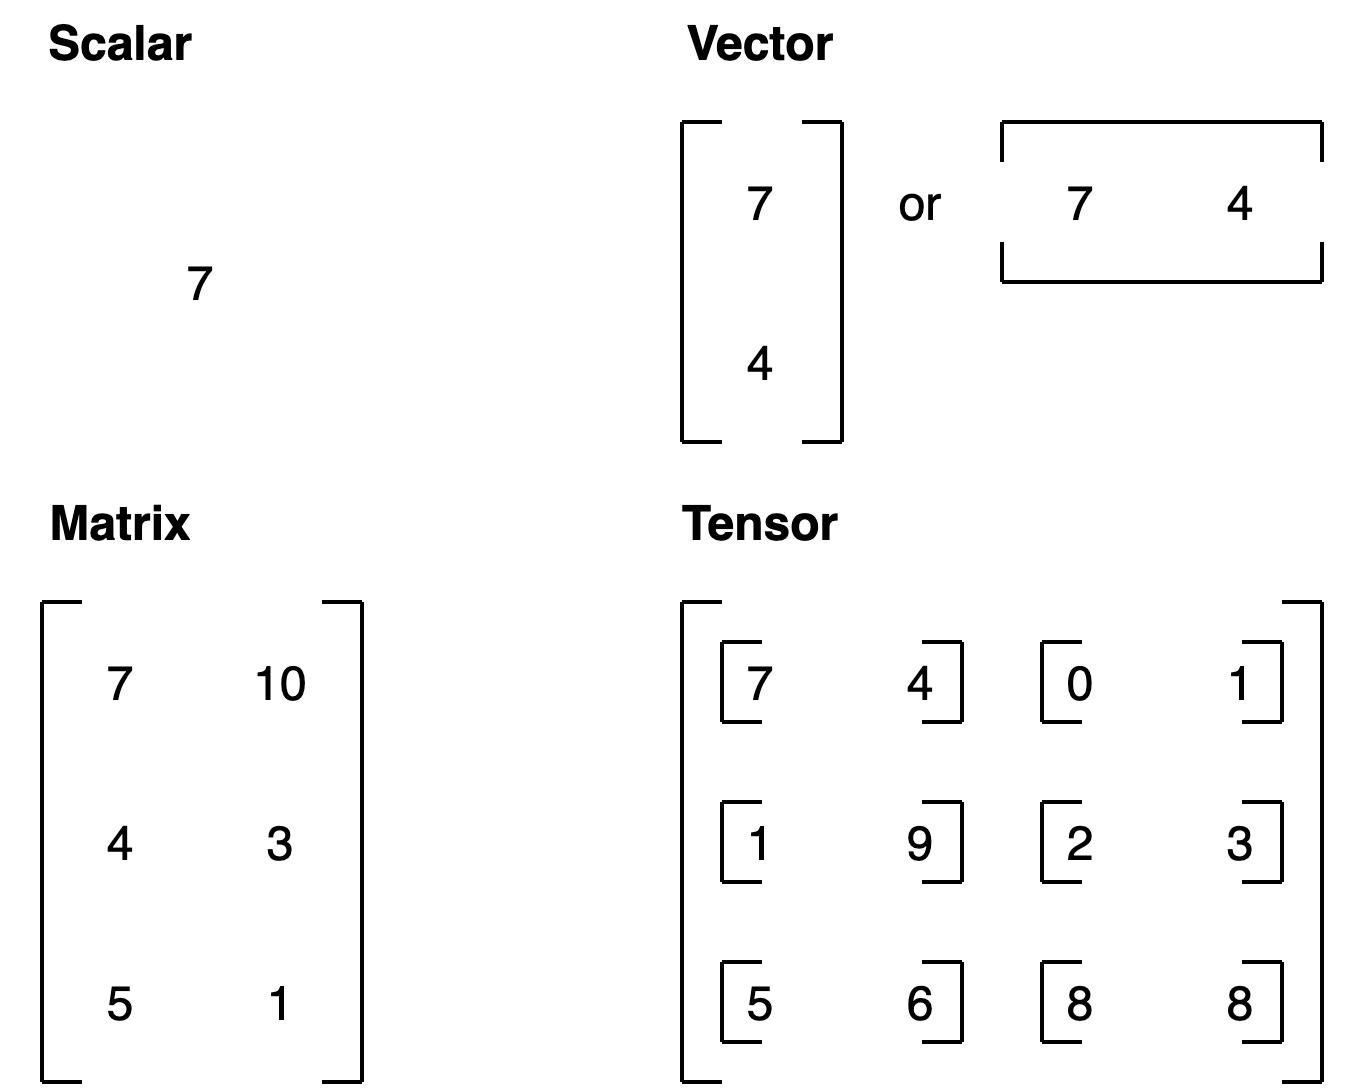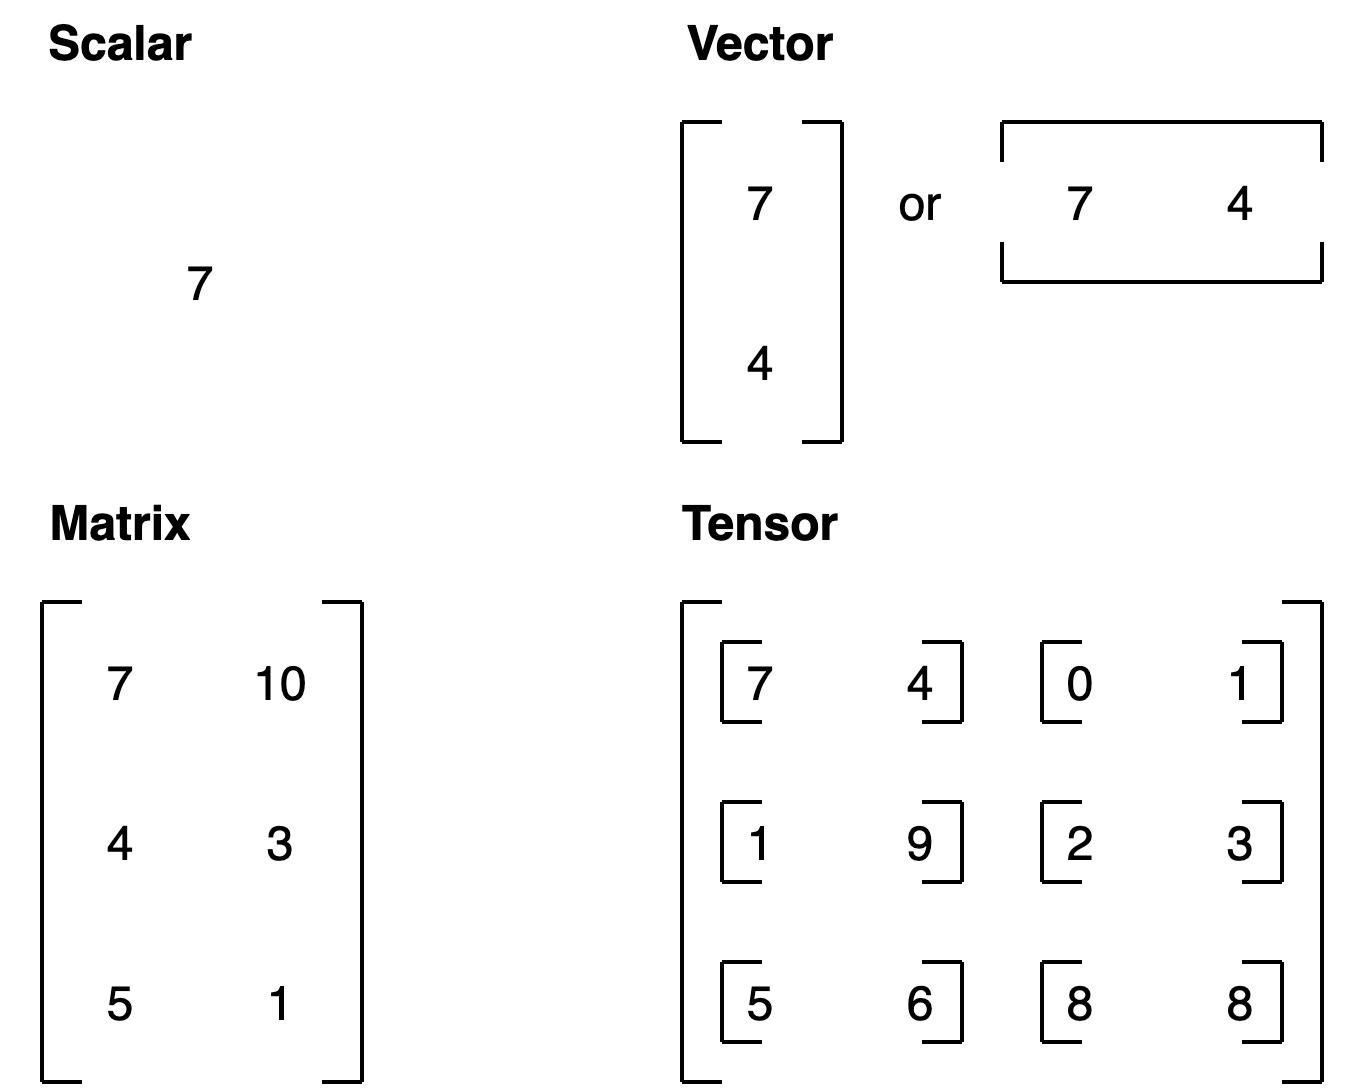

## Random Tensors

Why rando, tensors ?
Random tensors are important because the way many neural networks learn is that they start with tensors full of random numbers and then adjust those random numbers to better represent the data
`Start with randomn -> look at data -> update random number -> `

In [16]:
random_tensor = torch.rand(3,4)
random_tensor

tensor([[0.8676, 0.2450, 0.3746, 0.2283],
        [0.5206, 0.8102, 0.2786, 0.2454],
        [0.8512, 0.3438, 0.0117, 0.7220]])

In [17]:
random_tensor.ndim

2

In [18]:
random_tensor.shape

torch.Size([3, 4])

In [19]:
# Create a random tensor with similar shape to an image tensor
random_img_size_tensor = torch.rand(size=(3,224,224))
random_img_size_tensor.shape, random_img_size_tensor.ndim

(torch.Size([3, 224, 224]), 3)

## Zeros and ones

In [20]:
# Create a tensor of all zeros
zeros = torch.zeros(size=(3, 4))
zeros, zeros.dtype

(tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
 torch.float32)

In [21]:
zeros*random_tensor

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [22]:
# Create a tensor of all ones
ones = torch.ones(size=(3, 4))
ones, ones.dtype

(tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]),
 torch.float32)

## Creating a range and tensors like

In [23]:
# Use torch.arange(), torch.range() is deprecated 
zero_to_ten_deprecated = torch.range(0, 10) # Note: this may return an error in the future

# Create a range of values 0 to 10
zero_to_ten = torch.arange(start=0, end=10, step=1)
zero_to_ten


/tmp/ipykernel_8443/232764869.py:2: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  zero_to_ten_deprecated = torch.range(0, 10) # Note: this may return an error in the future


tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [24]:
# Can also create a tensor of zeros similar to another tensor
ten_zeros = torch.zeros_like(input=zero_to_ten) # will have same shape
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Tensor datatypes

In [25]:
# Default datatype for tensors is float32
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=None, # defaults to None, which is torch.float32 or whatever datatype is passed
                               device=None, # defaults to None, which uses the default tensor type
                               requires_grad=False) # if True, operations performed on the tensor are recorded 

float_32_tensor.shape, float_32_tensor.dtype, float_32_tensor.device


(torch.Size([3]), torch.float32, device(type='cpu'))

In [26]:
float_16_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=torch.float16) # torch.half would also work

float_16_tensor.dtype

torch.float16

## Getting information from tensors

In [27]:
# Create a tensor
some_tensor = torch.rand(3, 4)

# Find out details about it
print(some_tensor)
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Device tensor is stored on: {some_tensor.device}") # will default to CPU

tensor([[0.6675, 0.0898, 0.9432, 0.6380],
        [0.5826, 0.5095, 0.8642, 0.6905],
        [0.7885, 0.2796, 0.5133, 0.4836]])
Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


## Manipulating tensors (tensor operations)

These operations are often a wonderful dance between:

* Addition
* Substraction
* Multiplication (element-wise)
* Division
* Matrix multiplication


In [28]:
tensor = torch.tensor([1,2,3])
tensor + 10

tensor([11, 12, 13])

In [29]:
# Multiply tensors by 10
tensor * 10

tensor([10, 20, 30])

In [30]:
tensor

tensor([1, 2, 3])

In [31]:
# Subtract and reassign 
tensor -= 10
tensor

tensor([-9, -8, -7])

In [32]:
tensor += 10
tensor

tensor([1, 2, 3])


PyTorch also has a bunch of built-in functions like torch.mul() (short for multiplication) and torch.add() to perform basic operations.

In [33]:
torch.multiply(tensor,10)

tensor([10, 20, 30])

In [34]:
tensor

tensor([1, 2, 3])

In [35]:
# Element-wise multiplication (each element multiplies its equivalent, index 0->0, 1->1, 2->2)
print(tensor, "*", tensor)
print("Equals:", tensor * tensor)

tensor([1, 2, 3]) * tensor([1, 2, 3])
Equals: tensor([1, 4, 9])


## Matrix multiplication (is all you need)

The main two rules for matrix multiplication to remember are:

The inner dimensions must match:
* (3, 2) @ (3, 2) won't work
* (2, 3) @ (3, 2) will work* 
* (3, 2) @ (2, 3) will work
The resulting matrix has the shape of the outer dimensions:
* (2, 3) @ (3, 2) -> (2, 2)
* (3, 2) @ (2, 3) -> (3, 3)

In [36]:
tensor = torch.tensor([1,2,3])
tensor.shape

torch.Size([3])

In [37]:
# Element wise matrix multiplication
tensor * tensor

tensor([1, 4, 9])

In [38]:
tensor @ tensor

tensor(14)


You can do matrix multiplication by hand but it's not recommended.

The in-built torch.matmul() method is faster.

In [39]:
%%time
# Matrix multiplication by hand 
# (avoid doing operations with for loops at all cost, they are computationally expensive)
value = 0
for i in range(len(tensor)):
  value += tensor[i] * tensor[i]
value

CPU times: user 1.78 ms, sys: 0 ns, total: 1.78 ms
Wall time: 1.22 ms


tensor(14)

In [40]:
%%time
torch.matmul(tensor, tensor)

CPU times: user 114 µs, sys: 46 µs, total: 160 µs
Wall time: 141 µs


tensor(14)

One of the most common errors in deep learning (shape errors)
Because much of deep learning is multiplying and performing operations on matrices and matrices have a strict rule about what shapes and sizes can be combined, one of the most common errors you'll run into in deep learning is shape mismatches.

In [41]:
# Shapes need to be in the right way  
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)

tensor_B = torch.tensor([[7, 10],
                         [8, 11], 
                         [9, 12]], dtype=torch.float32)

torch.matmul(tensor_A, tensor_B) # (this will error)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

One of the ways to do this is with a transpose (switch the dimensions of a given tensor).

You can perform transposes in PyTorch using either:

torch.transpose(input, dim0, dim1) - where input is the desired tensor to transpose and dim0 and dim1 are the dimensions to be swapped.
tensor.T - where tensor is the desired tensor to transpose.

In [ ]:
# View tensor_A and tensor_B
print(tensor_A)
print(tensor_B)

In [42]:
# View tensor_A and tensor_B
print(tensor_A)
print(tensor_B.T)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([[ 7.,  8.,  9.],
        [10., 11., 12.]])


In [43]:
# The operation works when tensor_B is transposed
print(f"Original shapes: tensor_A = {tensor_A.shape}, tensor_B = {tensor_B.shape}\n")
print(f"New shapes: tensor_A = {tensor_A.shape} (same as above), tensor_B.T = {tensor_B.T.shape}\n")
print(f"Multiplying: {tensor_A.shape} * {tensor_B.T.shape} <- inner dimensions match\n")
print("Output:\n")
output = torch.matmul(tensor_A, tensor_B.T)
print(output) 
print(f"\nOutput shape: {output.shape}")

Original shapes: tensor_A = torch.Size([3, 2]), tensor_B = torch.Size([3, 2])

New shapes: tensor_A = torch.Size([3, 2]) (same as above), tensor_B.T = torch.Size([2, 3])

Multiplying: torch.Size([3, 2]) * torch.Size([2, 3]) <- inner dimensions match

Output:

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

Output shape: torch.Size([3, 3])


In [44]:

# torch.mm is a shortcut for matmul
torch.mm(tensor_A, tensor_B.T)

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

In [45]:
# Since the linear layer starts with a random weights matrix, let's make it reproducible (more on this later)
torch.manual_seed(42)
# This uses matrix multiplication
linear = torch.nn.Linear(in_features=2, # in_features = matches inner dimension of input 
                         out_features=6) # out_features = describes outer value 
x = tensor_A
output = linear(x)
print(f"Input shape: {x.shape}\n")
print(f"Output:\n{output}\n\nOutput shape: {output.shape}")

Input shape: torch.Size([3, 2])

Output:
tensor([[2.2368, 1.2292, 0.4714, 0.3864, 0.1309, 0.9838],
        [4.4919, 2.1970, 0.4469, 0.5285, 0.3401, 2.4777],
        [6.7469, 3.1648, 0.4224, 0.6705, 0.5493, 3.9716]],
       grad_fn=<AddmmBackward0>)

Output shape: torch.Size([3, 6])


# Finding the min, max, mean, sum, etc (aggregation)


In [46]:
x = torch.arange(0, 100, 10)

In [47]:
print(f"Minimum: {x.min()}")
print(f"Maximum: {x.max()}")
# print(f"Mean: {x.mean()}") # this will error
print(f"Mean: {x.type(torch.float32).mean()}") # won't work without float datatype
print(f"Sum: {x.sum()}")

Minimum: 0
Maximum: 90
Mean: 45.0
Sum: 450


In [48]:
torch.max(x), torch.min(x), torch.mean(x.type(torch.float32)), torch.sum(x)

(tensor(90), tensor(0), tensor(45.), tensor(450))

# Positional min/max

In [49]:
# Create a tensor
tensor = torch.arange(10, 100, 10)
print(f"Tensor: {tensor}")

# Returns index of max and min values
print(f"Index where max value occurs: {tensor.argmax()}")
print(f"Index where min value occurs: {tensor.argmin()}")

Tensor: tensor([10, 20, 30, 40, 50, 60, 70, 80, 90])
Index where max value occurs: 8
Index where min value occurs: 0


## Change tensor datatype
As mentioned, a common issue with deep learning operations is having your tensors in different datatypes.

If one tensor is in torch.float64 and another is in torch.float32, you might run into some errors.

In [50]:
# Create a tensor and check its datatype
tensor = torch.arange(10., 100., 10.)
tensor.dtype

torch.float32

In [51]:
# Create a float16 tensor
tensor_float16 = tensor.type(torch.float16)
tensor_float16

tensor([10., 20., 30., 40., 50., 60., 70., 80., 90.], dtype=torch.float16)

In [52]:
# Create a int8 tensor
tensor_int8 = tensor.type(torch.int8)
tensor_int8

tensor([10, 20, 30, 40, 50, 60, 70, 80, 90], dtype=torch.int8)

## Reshaping, stacking, squeezing and unsqueezing

In [53]:

# Create a tensor
import torch
x = torch.arange(1., 8.)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7.]), torch.Size([7]))

In [54]:

# Add an extra dimension
x_reshaped = x.reshape(1, 7)
x_reshaped, x_reshaped.shape


(tensor([[1., 2., 3., 4., 5., 6., 7.]]), torch.Size([1, 7]))

In [55]:
# Change view (keeps same data as original but changes view)
# See more: https://stackoverflow.com/a/54507446/7900723
z = x.view(1, 7)
z, z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7.]]), torch.Size([1, 7]))

In [56]:
# Stack tensors on top of each other
x_stacked = torch.stack([x, x, x, x], dim=0) # try changing dim to dim=1 and see what happens
x_stacked

tensor([[1., 2., 3., 4., 5., 6., 7.],
        [1., 2., 3., 4., 5., 6., 7.],
        [1., 2., 3., 4., 5., 6., 7.],
        [1., 2., 3., 4., 5., 6., 7.]])

In [57]:
print(f"Previous tensor: {x_reshaped}")
print(f"Previous shape: {x_reshaped.shape}")

# Remove extra dimension from x_reshaped
x_squeezed = x_reshaped.squeeze()
print(f"\nNew tensor: {x_squeezed}")
print(f"New shape: {x_squeezed.shape}")

Previous tensor: tensor([[1., 2., 3., 4., 5., 6., 7.]])
Previous shape: torch.Size([1, 7])

New tensor: tensor([1., 2., 3., 4., 5., 6., 7.])
New shape: torch.Size([7])


In [58]:
print(f"Previous tensor: {x_squeezed}")
print(f"Previous shape: {x_squeezed.shape}")

## Add an extra dimension with unsqueeze
x_unsqueezed = x_squeezed.unsqueeze(dim=0)
print(f"\nNew tensor: {x_unsqueezed}")
print(f"New shape: {x_unsqueezed.shape}")

Previous tensor: tensor([1., 2., 3., 4., 5., 6., 7.])
Previous shape: torch.Size([7])

New tensor: tensor([[1., 2., 3., 4., 5., 6., 7.]])
New shape: torch.Size([1, 7])



You can also rearrange the order of axes values with torch.permute(input, dims), where the input gets turned into a view with new dims.

## Indexing (selecting data from tensors)

In [59]:
# Create a tensor 
import torch
x = torch.arange(1, 10).reshape(1, 3, 3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))


You can also use : to specify "all values in this dimension" and then use a comma (,) to add another dimension.

In [60]:
# Let's index bracket by bracket
print(f"First square bracket:\n{x[0]}") 
print(f"Second square bracket: {x[0][0]}") 
print(f"Third square bracket: {x[0][0][0]}")

First square bracket:
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Second square bracket: tensor([1, 2, 3])
Third square bracket: 1


In [61]:
# Get all values of 0th dimension and the 0 index of 1st dimension
x[:, 0]

tensor([[1, 2, 3]])

In [62]:
# Get all values of 0th & 1st dimensions but only index 1 of 2nd dimension
x[:, :, 1]

tensor([[2, 5, 8]])

In [63]:

# Get all values of the 0 dimension but only the 1 index value of the 1st and 2nd dimension
x[:, 1, 1]

tensor([5])

In [64]:
# Get index 0 of 0th and 1st dimension and all values of 2nd dimension 
x[0, 0, :] # same as x[0][0]

tensor([1, 2, 3])

# PyTorch tensors & NumPy

In [65]:
# NumPy array to tensor
import torch
import numpy as np
array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array)
array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [66]:

# Change the array, keep the tensor
array = array + 1
array, tensor

(array([2., 3., 4., 5., 6., 7., 8.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [67]:
# Tensor to NumPy array
tensor = torch.ones(7) # create a tensor of ones with dtype=float32
numpy_tensor = tensor.numpy() # will be dtype=float32 unless changed
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

In [68]:
# Change the tensor, keep the array the same
tensor = tensor + 1
tensor, numpy_tensor

(tensor([2., 2., 2., 2., 2., 2., 2.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

# Reproducibility (trying to take the random out of random)


In [69]:

import torch

# Create two random tensors
random_tensor_A = torch.rand(3, 4)
random_tensor_B = torch.rand(3, 4)

print(f"Tensor A:\n{random_tensor_A}\n")
print(f"Tensor B:\n{random_tensor_B}\n")
print(f"Does Tensor A equal Tensor B? (anywhere)")
random_tensor_A == random_tensor_B

Tensor A:
tensor([[0.2666, 0.6274, 0.2696, 0.4414],
        [0.2969, 0.8317, 0.1053, 0.2695],
        [0.3588, 0.1994, 0.5472, 0.0062]])

Tensor B:
tensor([[0.9516, 0.0753, 0.8860, 0.5832],
        [0.3376, 0.8090, 0.5779, 0.9040],
        [0.5547, 0.3423, 0.6343, 0.3644]])

Does Tensor A equal Tensor B? (anywhere)


tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])

In [70]:
import torch 
import random
# Set the random seed
RANDOM_SEED = 42
torch.manual_seed(seed = RANDOM_SEED)
random_tensor_C = torch.rand(3, 4)

# Have to reset the seed every time a new rand() is called
# Without this the tensor_D would be different to tensor_C
torch.random.manual_seed(seed = RANDOM_SEED)
random_tensor_D = torch.rand(3,4)

print(f'Tensor C: \n{random_tensor_C}\n')
print(f'Tensor D: \n {random_tensor_D}\n')
random_tensor_C == random_tensor_D

Tensor C: 
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

Tensor D: 
 tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])



tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

# Running tensors on GPUs (and making faster computations)

In [71]:
# Check for GPU
import torch
torch.cuda.is_available()

True

In [72]:
# Set device type
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [73]:
# Count number of devices
torch.cuda.device_count()

1

# Putting tensors (and models) on the GPU

In [74]:

# Create tensor (default on CPU)
tensor = torch.tensor([1, 2, 3])

# Tensor not on GPU
print(tensor, tensor.device)

# Move tensor to GPU (if available)
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3]) cpu


tensor([1, 2, 3], device='cuda:0')

In [75]:
!nvidia-smi

/bin/bash: /home/nhat/miniconda3/envs/test/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Wed Jun  7 16:05:58 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0 Off |                  N/A |
| N/A   44C    P2    22W /  70W |    380MiB /  6144MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------

In [76]:

# Instead, copy the tensor back to cpu
tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu

array([1, 2, 3])

In [77]:
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')